In [1]:
import pandas as pd

In [43]:
dollar=lambda x:f"${x}"

In [106]:
df=pd.read_csv("transactions.csv",header=0,names=["Date","Store_No","Transaction_Count"],parse_dates=["Date"],index_col="Date",usecols=["Date","Transaction_Count"],converters={"Transaction_Count":dollar})
df

,Transaction_Count
Date,
2013-01-01,$770
2013-01-02,$2111
2013-01-02,$2358
2013-01-02,$3487
2013-01-02,$1922
...,...
2017-08-15,$2804
2017-08-15,$1573
2017-08-15,$2255


In [133]:
with pd.ExcelWriter("Transaction.xlsx") as writer:
    for i in range(2013,2018):
        df.loc[f"{i}"].to_excel(writer,sheet_name=str(i))

In [142]:
url="https://en.wikipedia.org/wiki/List_of_most-played_mobile_games_by_player_count"

In [145]:
html=pd.read_html(url)[1]

In [146]:
html

,Game,As of,Player count[a],Release date,Publisher(s),Ref.
0,Garena Free Fire,April 2023,1.6 billion,"November 24, 2017",Garena,[2]
1,PUBG Mobile,December 2022,1.27 billion,"March 19, 2018",Tencent / Krafton,[3][4][5]
2,Pokémon Go,February 2019,1 billion,"December 13, 2016",Niantic / The Pokémon Company,[6]
3,Mobile Legends: Bang Bang,November 2020,1 billion,"November 9, 2016",Moonton,[7]
4,Candy Crush Saga,"March 24, 2023",1 Billion,"April 12, 2012",King,[8]
...,...,...,...,...,...,...
63,Jikkyō Powerful Pro Yakyū,January 2020,43 million,"December 18, 2014",Konami,[39]
64,Quiz RPG: The World of Mystic Wiz,November 2017,40 million,"March 5, 2013",Colopl,[63]
65,PES Club Manager,July 2020,40 million,"June 5, 2015",Konami,[64]
66,Arknights,April 2020,40 million,"January 16, 2020",Hypergryph / Yostar,[65]


In [149]:
html=html.iloc[:15,:]

In [151]:
html["Player count[a]"]

0        1.6 billion
1       1.27 billion
2          1 billion
3          1 billion
4          1 Billion
5        500 million
6        500 million
7        500 million
8     485 million[b]
9        400 million
10       350 million
11       334 million
12       324 million
13       312 million
14       300 million
Name: Player count[a], dtype: object

In [152]:
import re

In [206]:
list1=[]
list2=[]
for i in list(html["Player count[a]"]):
    string=""
    for j in i:
        try:
            if j=="." or j=="0" or float(j):
                string=string+j
        except:
            if j=="B" or j=="b":
                list2.append(1000)
                break
            elif j=="M" or j=="m":
                list2.append(1)
                break
            else:
                pass
    list1.append(float(string))






In [207]:
list1

[1.6,
 1.27,
 1.0,
 1.0,
 1.0,
 500.0,
 500.0,
 500.0,
 485.0,
 400.0,
 350.0,
 334.0,
 324.0,
 312.0,
 300.0]

In [214]:
list3=[]
for i in list2:
    list3.append(float(i))

TypeError: can't multiply sequence by non-int of type 'list'

In [215]:
html

,Game,As of,Player count[a],Release date,Publisher(s),Ref.
0,Garena Free Fire,April 2023,1.6 billion,"November 24, 2017",Garena,[2]
1,PUBG Mobile,December 2022,1.27 billion,"March 19, 2018",Tencent / Krafton,[3][4][5]
2,Pokémon Go,February 2019,1 billion,"December 13, 2016",Niantic / The Pokémon Company,[6]
3,Mobile Legends: Bang Bang,November 2020,1 billion,"November 9, 2016",Moonton,[7]
4,Candy Crush Saga,"March 24, 2023",1 Billion,"April 12, 2012",King,[8]
5,Clash of Clans,September 2020,500 million,"August 2, 2012",Supercell,[9]
6,Fruit Ninja,August 2013,500 million,"April 21, 2010",Halfbrick Studios,[10]
7,Call of Duty: Mobile,May 2021,500 million,"October 1, 2019",Activision,[11]
8,Among Us,November 2020,485 million[b],"June 15, 2018",InnerSloth,[12]
9,Mini World,April 2020,400 million,"December 26, 2015",Miniwan,[13]


In [216]:
html["B/M"]=list3

C:\Users\Magesh\AppData\Local\Temp\ipykernel_13856\186333912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  html["B/M"]=list3


In [218]:
html["Amount"]=list1

C:\Users\Magesh\AppData\Local\Temp\ipykernel_13856\3371849982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  html["Amount"]=list1


In [219]:
html

,Game,As of,Player count[a],Release date,Publisher(s),Ref.,B/M,Amount
0,Garena Free Fire,April 2023,1.6 billion,"November 24, 2017",Garena,[2],1000.0,1.60
1,PUBG Mobile,December 2022,1.27 billion,"March 19, 2018",Tencent / Krafton,[3][4][5],1000.0,1.27
2,Pokémon Go,February 2019,1 billion,"December 13, 2016",Niantic / The Pokémon Company,[6],1000.0,1.00
3,Mobile Legends: Bang Bang,November 2020,1 billion,"November 9, 2016",Moonton,[7],1000.0,1.00
4,Candy Crush Saga,"March 24, 2023",1 Billion,"April 12, 2012",King,[8],1000.0,1.00
5,Clash of Clans,September 2020,500 million,"August 2, 2012",Supercell,[9],1.0,500.00
6,Fruit Ninja,August 2013,500 million,"April 21, 2010",Halfbrick Studios,[10],1.0,500.00
7,Call of Duty: Mobile,May 2021,500 million,"October 1, 2019",Activision,[11],1.0,500.00
8,Among Us,November 2020,485 million[b],"June 15, 2018",InnerSloth,[12],1.0,485.00
9,Mini World,April 2020,400 million,"December 26, 2015",Miniwan,[13],1.0,400.00


In [220]:
html["Val in Million"]=html["B/M"]*html["Amount"]
html

C:\Users\Magesh\AppData\Local\Temp\ipykernel_13856\1393907717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  html["Val in Million"]=html["B/M"]*html["Amount"]


,Game,As of,Player count[a],Release date,Publisher(s),Ref.,B/M,Amount,Val in Million
0,Garena Free Fire,April 2023,1.6 billion,"November 24, 2017",Garena,[2],1000.0,1.60,1600.0
1,PUBG Mobile,December 2022,1.27 billion,"March 19, 2018",Tencent / Krafton,[3][4][5],1000.0,1.27,1270.0
2,Pokémon Go,February 2019,1 billion,"December 13, 2016",Niantic / The Pokémon Company,[6],1000.0,1.00,1000.0
3,Mobile Legends: Bang Bang,November 2020,1 billion,"November 9, 2016",Moonton,[7],1000.0,1.00,1000.0
4,Candy Crush Saga,"March 24, 2023",1 Billion,"April 12, 2012",King,[8],1000.0,1.00,1000.0
5,Clash of Clans,September 2020,500 million,"August 2, 2012",Supercell,[9],1.0,500.00,500.0
6,Fruit Ninja,August 2013,500 million,"April 21, 2010",Halfbrick Studios,[10],1.0,500.00,500.0
7,Call of Duty: Mobile,May 2021,500 million,"October 1, 2019",Activision,[11],1.0,500.00,500.0
8,Among Us,November 2020,485 million[b],"June 15, 2018",InnerSloth,[12],1.0,485.00,485.0
9,Mini World,April 2020,400 million,"December 26, 2015",Miniwan,[13],1.0,400.00,400.0


In [245]:
html.sort_values(by="Val in Million",ascending=True,inplace=True)

C:\Users\Magesh\AppData\Roaming\Python\Python310\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [246]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Active players (in millions)')

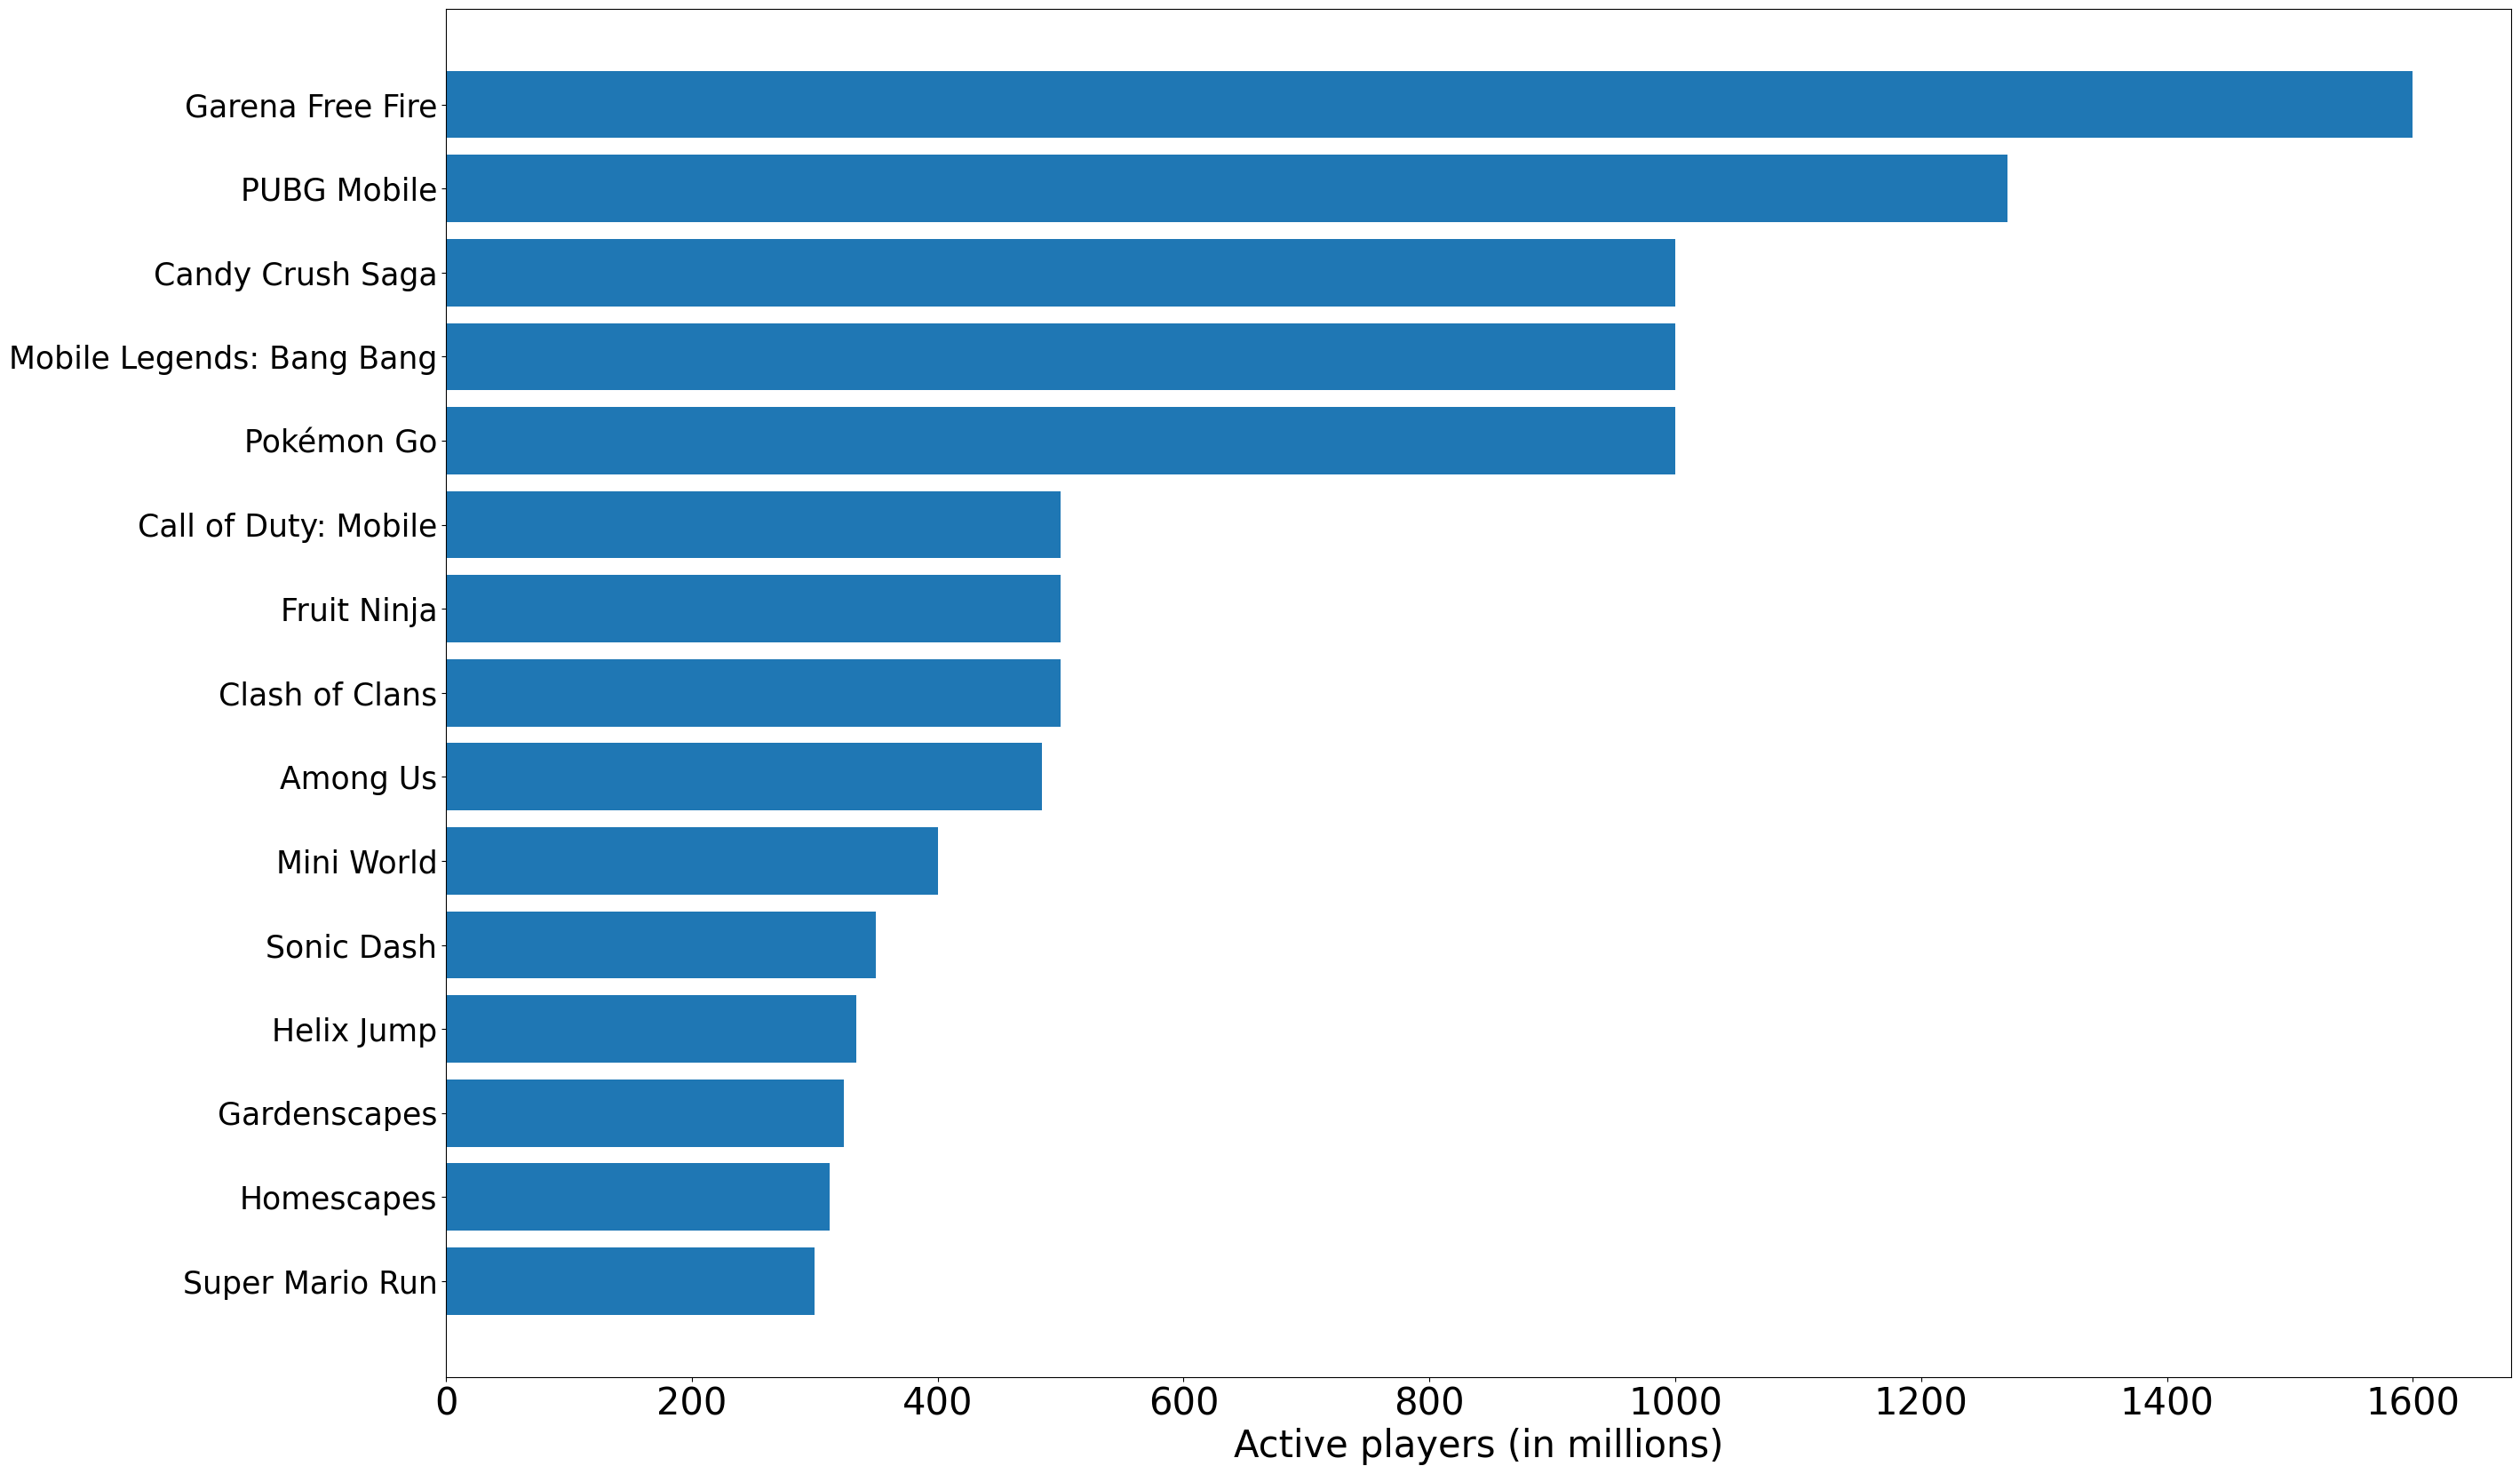

In [250]:
plt.figure(figsize=(30,20))
plt.barh(y=html["Game"],width=html["Val in Million"])
plt.yticks(fontsize=25)
plt.xticks(fontsize=30)
plt.xlabel("Active players (in millions)",fontsize=30)